In [1]:
import pandas as pd
from data_loader import load_linknyc_data, load_median_income_data


linknyc_data = load_linknyc_data("../output/linknyc_census_tract_analysis.csv")
income_data = load_median_income_data("../data/census_tract_median_income.csv")

print(linknyc_data.head())
print(income_data.head())

    TRACT_FIPS  MEDIAN_INCOME  INCOME_MARGIN_ERROR  TRACT_NUMBER COUNTY_NAME  \
0  36001000100        46797.0              11343.0          1.00      Albany   
1  36001000201        37218.0              17547.0          2.01      Albany   
2  36001000202        34160.0               6835.0          2.02      Albany   
3  36001000301        45547.0               8613.0          3.01      Albany   
4  36001000302        54375.0              23205.0          3.02      Albany   

  BOROUGH                                        NAME  
0   OTHER     Census Tract 1; Albany County; New York  
1   OTHER  Census Tract 2.01; Albany County; New York  
2   OTHER  Census Tract 2.02; Albany County; New York  
3   OTHER  Census Tract 3.01; Albany County; New York  
4   OTHER  Census Tract 3.02; Albany County; New York  
   tract_geoid borough  total_kiosks  live_kiosks  live_percentage  pop20  \
0  36005000100   BRONX             0            0              0.0   3772   
1  36005000200   BRONX       

In [4]:
df = linknyc_data.merge(income_data, 
                        left_on='tract_geoid', 
                        right_on='tract_fips', 
                        how='left')

borough_x
BRONX             222
BROOKLYN          383
MANHATTAN        1223
QUEENS            430
STATEN ISLAND      50
Name: total_kiosks, dtype: int64
2308
0.19080360979802322


<Axes: >

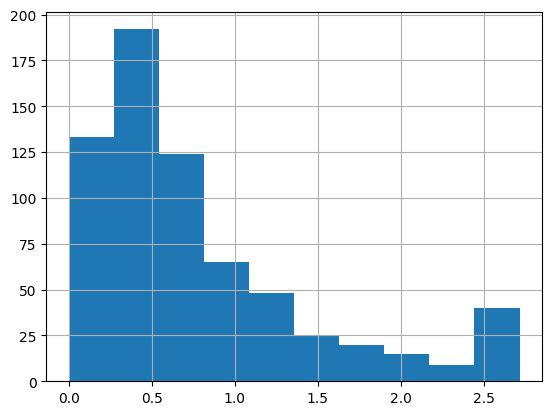

In [ ]:
print(df.groupby("borough_x")["total_kiosks"].sum())
print(df.total_kiosks.sum())

print(df[df["total_kiosks"] > 1]["tract_geoid"].count()*1.0/df["tract_geoid"].count())

clipped_total_kiosks = df[df["total_kiosks"] > 0]["kiosks_per_1000_pop"].clip(upper=df[df["total_kiosks"] > 0]["kiosks_per_1000_pop"].quantile(0.95))
clipped_total_kiosks.hist()

,tract_geoid,borough_x,total_kiosks,live_kiosks,live_percentage,pop20,land_area_sqmi,population_density,kiosks_per_sqmi,kiosks_per_1000_pop,link_5g_count,link_1_count,tract_fips,median_income,income_margin_error,tract_number,county_name,borough_y,name
1299,36061012500,MANHATTAN,15,15,100.0,2901,0.067279,43118.657969,222.95,5.17,0.0,15.0,3.606101e+10,136865.0,33279.0,125.0,New York,MANHATTAN,Census Tract 125; New York County; New York


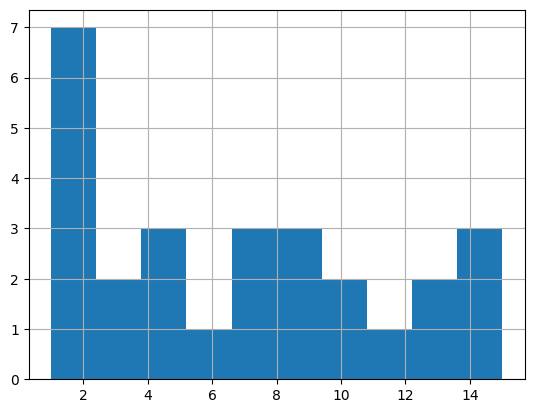

In [ ]:
outlier_total_kiosks = df[df["kiosks_per_1000_pop"] > 3]
outlier_total_kiosks.total_kiosks.hist()
outlier_total_kiosks[outlier_total_kiosks.total_kiosks == outlier_total_kiosks.total_kiosks.max()]

In [42]:
1875630 / (3.14159 * (150**2))


26.534758938414413

In [50]:
total_nyc_land_area_sqft = df.land_area_sqmi.sum() * 2.788e+7
coverage_opt_sqft = (3.14159 * (150**2))
coverage_extended_sqft = (3.14159 * (750**2))


print(f"optimal coverage: {total_nyc_land_area_sqft / coverage_opt_sqft}")
print(f"extended coverage: {total_nyc_land_area_sqft / coverage_extended_sqft}")

optimal coverage: 118506.85294030853
extended coverage: 4740.274117612341


In [62]:
towers_5g = df[df["link_5g_count"] > 0]
print(f"there are {towers_5g.link_5g_count.sum()} 5g towers")
towers_1g = df[df["link_1_count"] > 0]

print(f"5g median income: {(towers_5g.median_income * towers_5g.pop20).sum() / towers_5g.pop20.sum()}")
print(f"1g median income: {(towers_1g.median_income * towers_1g.pop20).sum() / towers_1g.pop20.sum()}")


print((99114.83809680415-75401.44094927379)/99114.83809680415)

there are 262.0 5g towers
5g median income: 75401.44094927379
1g median income: 99114.83809680415
0.23925173670131808


               total_kiosks    pop20  median_income
total_kiosks       1.000000  0.33937       0.222602
pop20              0.339370  1.00000      -0.037700
median_income      0.222602 -0.03770       1.000000


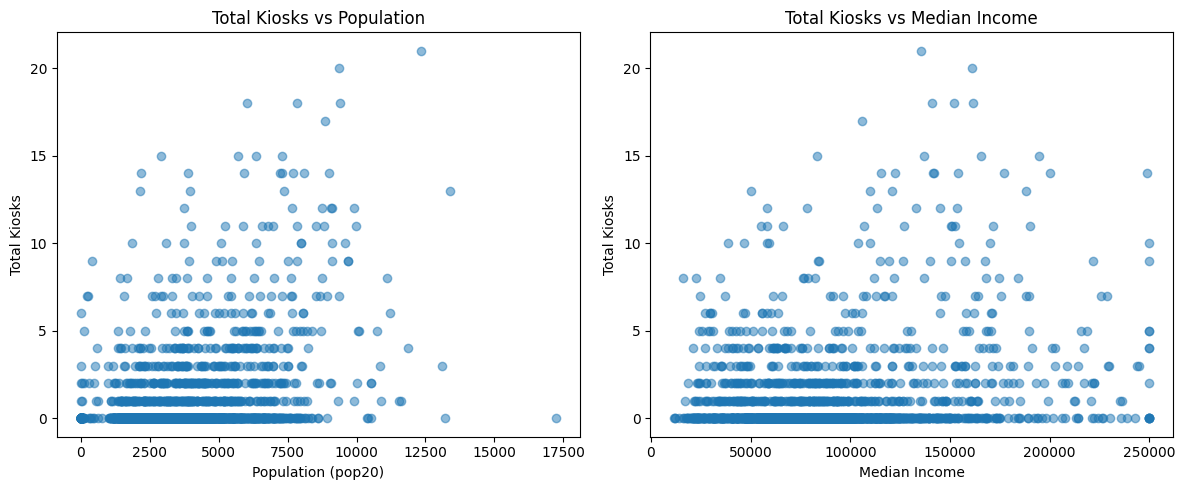

In [8]:
print(df[['total_kiosks', 'pop20', 'median_income']].corr())

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(df['pop20'], df['total_kiosks'], alpha=0.5)
axes[0].set_xlabel('Population (pop20)')
axes[0].set_ylabel('Total Kiosks')
axes[0].set_title('Total Kiosks vs Population')

axes[1].scatter(df['median_income'], df['total_kiosks'], alpha=0.5)
axes[1].set_xlabel('Median Income')
axes[1].set_ylabel('Total Kiosks')
axes[1].set_title('Total Kiosks vs Median Income')

plt.tight_layout()
plt.show()